## Importing Libraries 
***

In [34]:
# for data manipulation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# for visualization
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# preprocessing functions and evaluation models
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import KFold, cross_val_predict

# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

## Load the data
***

In [35]:
X_train = pd.read_csv('D:\\IPCV\\Data Mining\\DMML PROJECT\\x_train.csv',index_col='id')
Y_train = pd.read_csv('D:\\IPCV\\Data Mining\\DMML PROJECT\\y_train.csv',index_col='id')

In [36]:
train = pd.concat([X_train, Y_train], axis=1, sort=False)

## Data Exploration
***

In [37]:
print("Number of rows and columns in the train dataset are:", train.shape)

Number of rows and columns in the train dataset are: (406708, 55)


In [38]:
train.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
id,,,,,,,,,,,,,,,,,,,,,
0,3342,15,13,350,55,2118,208,212,139,1486,...,0,0,0,0,0,0,0,0,0,1
1,2764,39,13,175,43,2648,220,210,122,366,...,0,0,0,0,0,0,0,0,0,2
2,2773,158,5,162,14,2012,226,241,149,967,...,0,0,0,0,0,0,0,0,0,2
3,3083,108,16,30,-14,2639,246,220,98,1909,...,0,0,0,0,0,0,0,0,0,1
4,3096,40,4,201,38,4592,220,231,147,2432,...,0,0,0,0,0,0,0,0,0,1
5,2990,87,12,306,70,1819,238,219,109,1350,...,1,0,0,0,0,0,0,0,0,1
6,3101,43,10,270,61,2901,222,217,129,5676,...,0,0,0,0,0,0,0,0,0,2
7,2894,351,11,872,128,2324,201,222,159,895,...,0,0,0,0,0,0,0,0,0,2
8,3106,158,24,540,29,942,238,236,114,2343,...,0,0,0,0,0,0,0,0,0,1


In [39]:
train.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area_1                     int64
Wilderness_Area_2                     int64
Wilderness_Area_3                     int64
Wilderness_Area_4                     int64
Soil_Type_1                           int64
Soil_Type_2                           int64
Soil_Type_3                           int64
Soil_Type_4                           int64
Soil_Type_5                           int64
Soil_Type_6                           int64
Soil_Type_7                           int64
Soil_Type_8                           int64
Soil_Type_9                     

***
<p>There is one single data tye for all features<p>

In [40]:
train.iloc[:,1:10].describe()

,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000
mean,155.763309,14.103413,269.485181,46.467994,2349.097488,212.107827,223.335543,142.593190,1979.708533
std,111.925462,7.490411,212.462577,58.327213,1559.559608,26.785128,19.777075,38.269583,1323.353986
min,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,9.000000,108.000000,7.000000,1103.000000,198.000000,213.000000,119.000000,1024.000000
50%,127.000000,13.000000,218.000000,30.000000,1994.000000,218.000000,226.000000,143.000000,1710.000000
75%,261.000000,18.000000,390.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,360.000000,66.000000,1397.000000,599.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


<p>All the features have data range between 0 and 255 except these 4 features<p>   
<ul>
<li>Horizontal_Distance_To_Hydrology: 0, 1397
<li>Vertical_Distance_To_Hydrology: -173, 599
<li>Horizontal_Distance_To_Roadways: 0, 7117
<li>Horizaontal_Distance_To_Firepoints: 0, 7173     

In [41]:
train.nunique()

Elevation                             1964
Aspect                                 361
Slope                                   65
Horizontal_Distance_To_Hydrology       539
Vertical_Distance_To_Hydrology         668
Horizontal_Distance_To_Roadways       5727
Hillshade_9am                          205
Hillshade_Noon                         181
Hillshade_3pm                          255
Horizontal_Distance_To_Fire_Points    5758
Wilderness_Area_1                        2
Wilderness_Area_2                        2
Wilderness_Area_3                        2
Wilderness_Area_4                        2
Soil_Type_1                              2
Soil_Type_2                              2
Soil_Type_3                              2
Soil_Type_4                              2
Soil_Type_5                              2
Soil_Type_6                              2
Soil_Type_7                              2
Soil_Type_8                              2
Soil_Type_9                              2
Soil_Type_1

***
<p>Check if Wilderness area and Soil_Type are one hot encoded or not<p>

In [42]:
size=10
Uni = []
for i in range(size+1,len(train.columns)-1):
    Uni.append(pd.unique(train[train.columns[i]].values))
Uni

[array([0, 1], dtype=int64),
 array([1, 0], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([1, 0], dtype=int64),
 array([0, 1],

In [43]:
train.iloc[:,10:14].sum(axis=1).sum()

406708

In [44]:
train.iloc[:,14:54].sum(axis=1).sum()

406708

They are binary, and only one Soil_Type and one Wilderness_Area equal to one shows that they are onehot encoded
****

In [45]:
train.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0
Soil_Type_11                          0


***
<p>There are no NA in the dataset<p>

## Outlier Removal
***
<p> An outlier is defined as being any point of data that lies over 1.5 IQRs below the first quartile (Q1) or above the third quartile (Q3)in a data set. <p>
<p>High = (Q3) + 1.5 IQR <p>
<p>Low = (Q1) – 1.5 IQR <p>


In [46]:
def outlier_function(df, col_name):

    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [47]:
for i in train.columns:
    if outlier_function(train, i)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(train, i)[2], i))

There are 189 outliers in Slope
There are 199 outliers in Horizontal_Distance_To_Hydrology
There are 3729 outliers in Vertical_Distance_To_Hydrology
There are 727 outliers in Hillshade_9am
There are 835 outliers in Hillshade_Noon
There are 7 outliers in Horizontal_Distance_To_Fire_Points
There are 20979 outliers in Wilderness_Area_2
There are 25874 outliers in Wilderness_Area_4
There are 2113 outliers in Soil_Type_1
There are 5284 outliers in Soil_Type_2
There are 3370 outliers in Soil_Type_3
There are 8732 outliers in Soil_Type_4
There are 1107 outliers in Soil_Type_5
There are 4633 outliers in Soil_Type_6
There are 69 outliers in Soil_Type_7
There are 127 outliers in Soil_Type_8
There are 810 outliers in Soil_Type_9
There are 22805 outliers in Soil_Type_10
There are 8616 outliers in Soil_Type_11
There are 20900 outliers in Soil_Type_12
There are 12226 outliers in Soil_Type_13
There are 420 outliers in Soil_Type_14
There are 2 outliers in Soil_Type_15
There are 2001 outliers in Soil_T

In [48]:
train = train[(train['Horizontal_Distance_To_Hydrology'] > outlier_function(train, 'Horizontal_Distance_To_Hydrology')[0]) &
              (train['Horizontal_Distance_To_Hydrology'] < outlier_function(train, 'Horizontal_Distance_To_Hydrology')[1])]
train = train[(train['Vertical_Distance_To_Hydrology'] > outlier_function(train, 'Vertical_Distance_To_Hydrology')[0]) &
              (train['Vertical_Distance_To_Hydrology'] < outlier_function(train, 'Vertical_Distance_To_Hydrology')[1])]
trees = train[(train['Horizontal_Distance_To_Fire_Points'] > outlier_function(train, 'Horizontal_Distance_To_Fire_Points')[0]) &
              (train['Horizontal_Distance_To_Fire_Points'] < outlier_function(train, 'Horizontal_Distance_To_Fire_Points')[1])]
trees.shape

(402774, 55)

## Data Normalization
***
<p>Data normalization has not improved the accuracy so I did not use it<p>

No handles with labels found to put in legend.


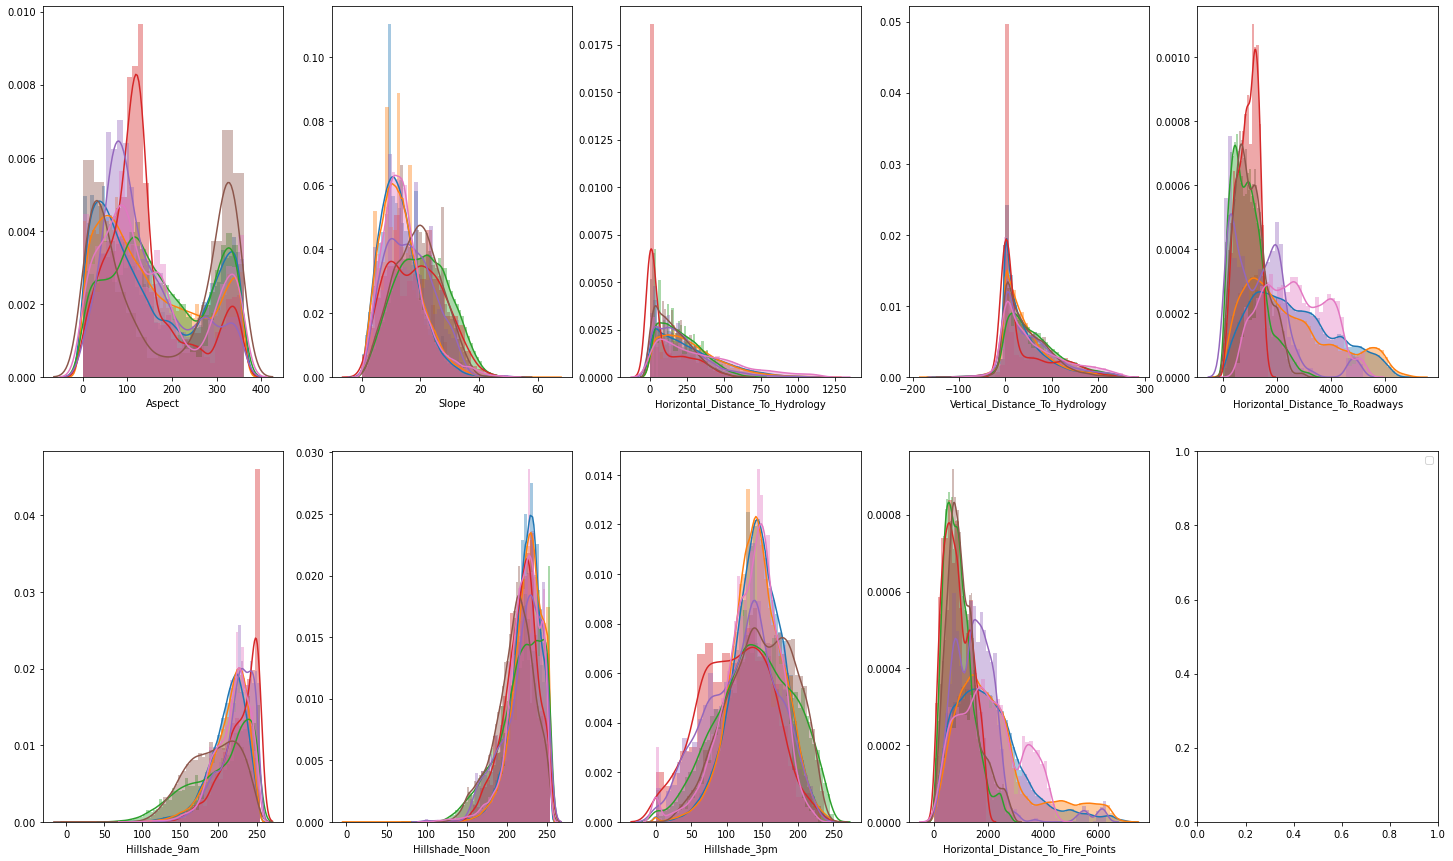

In [49]:
fig, axes = plt.subplots(nrows = 2,ncols = 5,figsize = (25,15))
g= sns.FacetGrid(train, hue='Cover_Type',height=5)
(g.map(sns.distplot,trees.columns[1],ax=axes[0][0]))
(g.map(sns.distplot, trees.columns[2],ax=axes[0][1]))
(g.map(sns.distplot, trees.columns[3],ax=axes[0][2]))
(g.map(sns.distplot, trees.columns[4],ax=axes[0][3]))
(g.map(sns.distplot, trees.columns[5],ax=axes[0][4]))
(g.map(sns.distplot, trees.columns[6],ax=axes[1][0]))
(g.map(sns.distplot, trees.columns[7],ax=axes[1][1]))
(g.map(sns.distplot, trees.columns[8],ax=axes[1][2]))
(g.map(sns.distplot, trees.columns[9],ax=axes[1][3]))
#(g.map(sns.distplot, train.columns[10],ax=axes[1][4]))
plt.close(2)
plt.legend()

In [50]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result
#trees = normalize(trees)

## Balancing Data
***


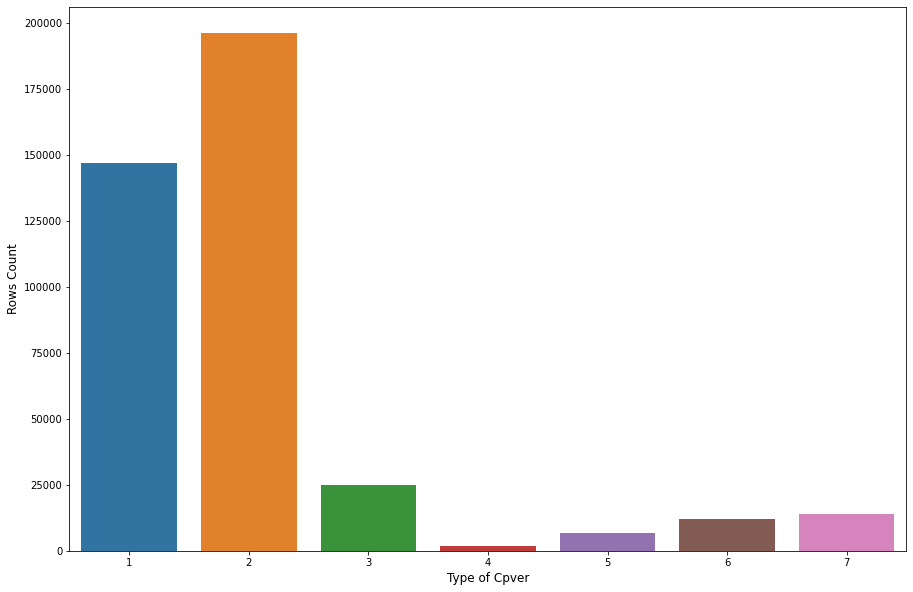

In [51]:
plt.figure(figsize=(15,10))
sns.countplot(train['Cover_Type'])
plt.xlabel("Type of Cpver", fontsize=12)
plt.ylabel("Rows Count", fontsize=12)
plt.show()

Random over-sampling:
7    196262
6    196262
5    196262
4    196262
3    196262
2    196262
1    196262
Name: Cover_Type, dtype: int64


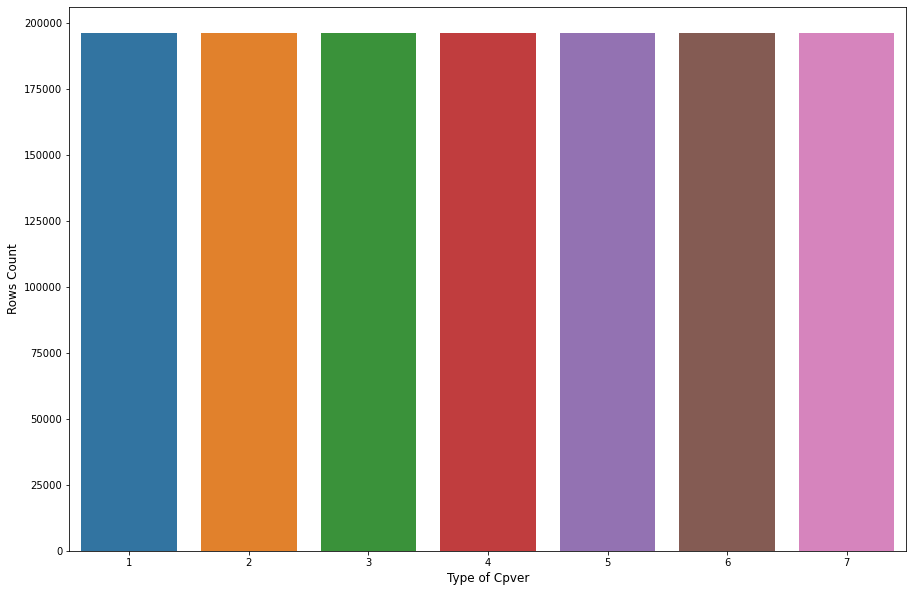

In [52]:
# Class count
count_class_2,count_class_1,count_class_3,count_class_7,count_class_6,count_class_5,count_class_4 = trees.Cover_Type.value_counts()

# Divide by class
class_1 = trees[trees['Cover_Type'] == 1]
class_2 = trees[trees['Cover_Type'] == 2]
class_3 = trees[trees['Cover_Type'] == 3]
class_4 = trees[trees['Cover_Type'] == 4]
class_5 = trees[trees['Cover_Type'] == 5]
class_6 = trees[trees['Cover_Type'] == 6]
class_7 = trees[trees['Cover_Type'] == 7]

class_1_over = class_1.sample(count_class_2, replace=True)
class_3_over = class_3.sample(count_class_2, replace=True)
class_4_over = class_4.sample(count_class_2, replace=True)
class_5_over = class_5.sample(count_class_2, replace=True)
class_6_over = class_6.sample(count_class_2, replace=True)
class_7_over = class_7.sample(count_class_2, replace=True)
df_test_over = pd.concat([class_1_over, class_2, class_3_over, class_4_over, class_5_over, class_6_over, class_7_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Cover_Type.value_counts())

plt.figure(figsize=(15,10))
sns.countplot(df_test_over['Cover_Type'])
plt.xlabel("Type of Cpver", fontsize=12)
plt.ylabel("Rows Count", fontsize=12)
plt.show()

In [53]:
#trees = df_test_over

## Feature Generation
***

Text(0.5, 1.05, 'Pearson Correlation of All Features')

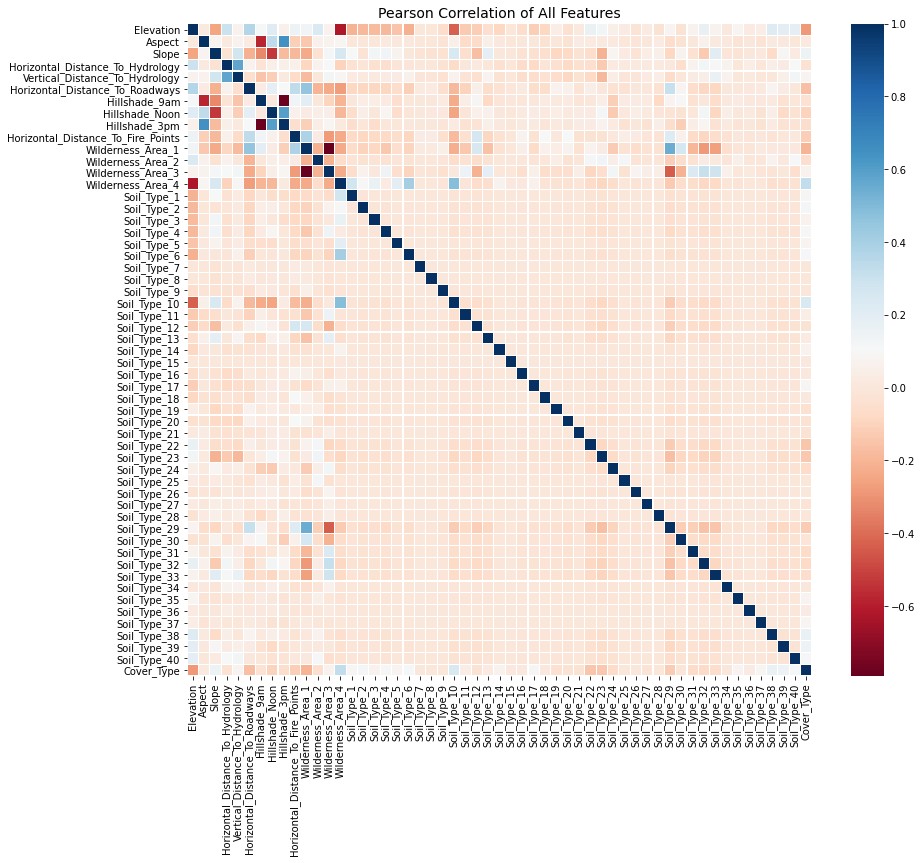

In [54]:
plt.figure(figsize=(14,12))

# plot heatmap set the title
colormap = plt.cm.RdBu
sns.heatmap(trees.corr(),linewidths=0.1,vmax=1.0, 
            square=False, cmap=colormap, linecolor='white', annot=False)
plt.title('Pearson Correlation of All Features', y=1.05, size=14)

In [55]:
train=trees

In [56]:
train.shape

(402774, 55)

In [57]:
def add_feature(data):   
    data['Ele_minus_VDtHyd'] = data.Elevation-data.Vertical_Distance_To_Hydrology
    data['Ele_plus_VDtHyd'] = data.Elevation+data.Vertical_Distance_To_Hydrology
    data['Distanse_to_Hydrolody'] = (data['Horizontal_Distance_To_Hydrology']**2+data['Vertical_Distance_To_Hydrology']**2)**0.5
    data['Hydro_plus_Fire'] = data['Horizontal_Distance_To_Hydrology']+data['Horizontal_Distance_To_Fire_Points']
    data['Hydro_minus_Fire'] = data['Horizontal_Distance_To_Hydrology']-data['Horizontal_Distance_To_Fire_Points']
    data['Hydro_plus_Road'] = data['Horizontal_Distance_To_Hydrology']+data['Horizontal_Distance_To_Roadways']
    data['Hydro_minus_Road'] = data['Horizontal_Distance_To_Hydrology']-data['Horizontal_Distance_To_Roadways']
    data['Fire_plus_Road'] = data['Horizontal_Distance_To_Fire_Points']+data['Horizontal_Distance_To_Roadways']
    data['Fire_minus_Road'] = data['Horizontal_Distance_To_Fire_Points']-data['Horizontal_Distance_To_Roadways']
    return data

In [58]:
train = add_feature(train)

<ipython-input-57-73b323aadc09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Ele_minus_VDtHyd'] = data.Elevation-data.Vertical_Distance_To_Hydrology
<ipython-input-57-73b323aadc09>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Ele_plus_VDtHyd'] = data.Elevation+data.Vertical_Distance_To_Hydrology
<ipython-input-57-73b323aadc09>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [59]:
#train = train.drop(columns=['Soil_Type_7', 'Soil_Type_15'])

In [60]:
x_test = pd.read_csv('D:\\IPCV\\Data Mining\\DMML PROJECT\\x_test.csv',index_col='id',skipinitialspace=True)
x_test = add_feature(x_test)
#x_test = x_test.drop(columns=['Soil_Type_7', 'Soil_Type_15'])

In [61]:
#X_train = train.drop(['Id','Cover_Type','soil_type','Wilderness_Area'], axis = 1)
X_train = train.drop(['Cover_Type'], axis = 1)
y_train = train.Cover_Type
X_train.shape

(402774, 63)

In [62]:
X_train.shape

(402774, 63)

## Logistic Regression
***

In [85]:
logit = LogisticRegression(C=1, solver='lbfgs', max_iter=500,
                           random_state=17, n_jobs=4,
                          multi_class='multinomial')
logit_pipe = Pipeline([('scaler', StandardScaler()), 
                       ('logit', logit)])

In [ ]:
%%time
model=logit_pipe.fit(X_train, y_train)

## Random Forest
***

In [24]:
first_forest = RandomForestClassifier(n_estimators=250, random_state=23, n_jobs=4)

In [25]:
%%time
first_forest.fit(X_train, y_train)
forest_val_pred = first_forest.predict(x_test)

Wall time: 10min 29s


## AdaBoost
***

In [28]:
clf = AdaBoostClassifier(n_estimators=100)
#scores = cross_val_score(clf, X_train, y_train, cv=5)

In [29]:
clf.fit(X_train, y_train)
ada_val_pred = clf.predict(x_test)

## Extra Trees 
***

In [ ]:
extra_tree.fit(X_train, Y_train)
extra_tree_val_pred = extra_tree.predict(x_test)

In [ ]:
extra_tree = ExtraTreesClassifier(n_estimators=250, random_state=17, n_jobs=-1)

## Grdient Boosting Classifier
***

In [ ]:
est = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0, loss='deviance').fit(X_train, y_train)

In [ ]:
GBC_val_pred = est.predict(x_test)

## Voting Classifier
***

In [ ]:
estimators = []
model1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
estimators.append(('XGB', model1))
model2 = SVC()
estimators.append(('SVC', model2))
model3 = DecisionTreeClassifier()
estimators.append(('Tree', model3))
model4 = RandomForestClassifier(
    n_estimators=150, random_state=23, n_jobs=7)
estimators.append(('Forest', model4))
ensemble = VotingClassifier(estimators)

In [ ]:
ensemble.fit(X_train, y_train)
ensemble_val_pred = ensemble.predict(x_test)

## Stacking Classifier
***

In [ ]:
estimators = []
model1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
estimators.append(('XGB', model1))
model2 = SVC()
estimators.append(('SVC', model2))
model3 = DecisionTreeClassifier()
#estimators.append(('Tree', model3))
model4 = RandomForestClassifier(
    n_estimators=150, random_state=23, n_jobs=7)
estimators.append(('Forest', model4))
ensemble = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(),cv=10,n_jobs=1,verbose=10)

In [ ]:
ensemble.fit(X_train, y_train)
ensemble_val_pred = ensemble.predict(x_test)

## Tuning
***
<p>I have used Grid search for tuning the parameters<p>

In [19]:
%%time 

lr_pipe = Pipeline(
    steps = [
        ('scaler', MinMaxScaler()),
        ('classifier', LogisticRegression(solver='lbfgs', n_jobs=1))
    ]
)

lr_param_grid = {
    'classifier__C': [1, 10, 100,1000],
}


np.random.seed(1)
grid_search = GridSearchCV(lr_pipe, lr_param_grid, cv=5, refit='True',verbose=10)
grid_search.fit(X_train, y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] classifier__C=1 .................................................


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ..................... classifier__C=1, score=0.722, total= 2.5min
[CV] classifier__C=1 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.5min remaining:    0.0s
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ..................... classifier__C=1, score=0.721, total= 3.0min
[CV] classifier__C=1 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.5min remaining:    0.0s
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ..................... classifier__C=1, score=0.721, total= 3.0min
[CV] classifier__C=1 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  8.5min remaining:    0.0s
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ..................... classifier__C=1, score=0.722, total= 2.9min
[CV] classifier__C=1 .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 11.4min remaining:    0.0s
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ..................... classifier__C=1, score=0.723, total= 2.9min
[CV] classifier__C=10 ................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 14.3min remaining:    0.0s
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] .................... classifier__C=10, score=0.722, total= 3.4min
[CV] classifier__C=10 ................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 17.7min remaining:    0.0s
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] .................... classifier__C=10, score=0.720, total= 2.6min
[CV] classifier__C=10 ................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 20.2min remaining:    0.0s
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] .................... classifier__C=10, score=0.722, total= 3.4min
[CV] classifier__C=10 ................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 23.6min remaining:    0.0s
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] .................... classifier__C=10, score=0.723, total= 2.5min
[CV] classifier__C=10 ................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 26.1min remaining:    0.0s
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] .................... classifier__C=10, score=0.723, total= 3.3min
[CV] classifier__C=100 ...............................................


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................... classifier__C=100, score=0.722, total= 3.3min
[CV] classifier__C=100 ...............................................


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................... classifier__C=100, score=0.720, total= 3.3min
[CV] classifier__C=100 ...............................................


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................... classifier__C=100, score=0.722, total= 2.4min
[CV] classifier__C=100 ...............................................


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................... classifier__C=100, score=0.722, total= 2.3min
[CV] classifier__C=100 ...............................................


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................... classifier__C=100, score=0.723, total= 3.1min
[CV] classifier__C=1000 ..............................................


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] .................. classifier__C=1000, score=0.723, total= 2.9min
[CV] classifier__C=1000 ..............................................


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] .................. classifier__C=1000, score=0.719, total= 2.2min
[CV] classifier__C=1000 ..............................................


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] .................. classifier__C=1000, score=0.722, total= 2.1min
[CV] classifier__C=1000 ..............................................


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] .................. classifier__C=1000, score=0.722, total= 2.0min
[CV] classifier__C=1000 ..............................................


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] .................. classifier__C=1000, score=0.723, total= 2.0min


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 55.0min finished


0.7222382041644103
{'classifier__C': 10}
Wall time: 57min 40s


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
%%time 

rf_pipe = Pipeline(
    steps = [
        ('classifier', RandomForestClassifier(n_estimators=500))
    ]
)

param_grid = {
       'classifier__min_samples_leaf': [1,4,7],
    'classifier__max_depth': [34,38,32],
}

np.random.seed(1)
rf_grid_search = GridSearchCV(rf_pipe, param_grid, cv=5, refit='True', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
rf_model = rf_grid_search.best_estimator_

print(rf_grid_search.best_score_)
print(rf_grid_search.best_params_)

In [ ]:
%%time 

xgd_pipe = Pipeline(
    steps = [
        ('classifier', XGBClassifier(n_estimators=50, subsample=0.5))
    ]
)

param_grid = {
    'classifier__learning_rate' : [0.45],
    'classifier__min_samples_split' : [32],
    'classifier__min_samples_leaf' : [1],
    'classifier__max_depth': [42]
    
}

np.random.seed(1)
xgd_grid_search = GridSearchCV(xgd_pipe, param_grid, cv=5,
                              refit='True', verbose = 10, n_jobs=1)
xgd_grid_search.fit(X_train, y_train)

print(xgd_grid_search.best_score_)
print(xgd_grid_search.best_params_)

In [63]:
xrf_pipe = Pipeline(
    steps = [
        ('classifier', ExtraTreesClassifier(n_estimators=500,random_state=0, criterion = 'entropy'))
    ]
)


xrf_param_grid = {
    'classifier__min_samples_leaf': [1], #[1,4,7]
    'classifier__max_depth': [42], #[34,38,32]
}

np.random.seed(1)
xrf_grid_search = GridSearchCV(xrf_pipe, xrf_param_grid, cv=5, refit='True', n_jobs=1,verbose=10)
xrf_grid_search.fit(X_train, y_train)

print(xrf_grid_search.best_score_)
print(xrf_grid_search.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] classifier__max_depth=42, classifier__min_samples_leaf=1 ........
[CV]  classifier__max_depth=42, classifier__min_samples_leaf=1, score=0.975, total=28.7min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 28.7min remaining:    0.0s


[CV] classifier__max_depth=42, classifier__min_samples_leaf=1 ........
[CV]  classifier__max_depth=42, classifier__min_samples_leaf=1, score=0.973, total=36.3min
[CV] classifier__max_depth=42, classifier__min_samples_leaf=1 ........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 65.1min remaining:    0.0s


[CV]  classifier__max_depth=42, classifier__min_samples_leaf=1, score=0.973, total=41.6min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 106.9min remaining:    0.0s


[CV] classifier__max_depth=42, classifier__min_samples_leaf=1 ........
[CV]  classifier__max_depth=42, classifier__min_samples_leaf=1, score=0.973, total=38.0min
[CV] classifier__max_depth=42, classifier__min_samples_leaf=1 ........


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 144.9min remaining:    0.0s


[CV]  classifier__max_depth=42, classifier__min_samples_leaf=1, score=0.974, total=31.7min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 176.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 176.8min finished


0.9734267856936658
{'classifier__max_depth': 42, 'classifier__min_samples_leaf': 1}


In [25]:
xrf_model = xrf_grid_search.best_estimator_
final_model = xrf_grid_search.best_estimator_.steps[0][1]
final_model.fit(X_train, y_train)

ExtraTreesClassifier(criterion='entropy', max_depth=42, n_estimators=500,
                     random_state=0)

In [28]:
X_test = pd.read_csv('D:\\IPCV\\Data Mining\\DMML PROJECT\\x_test.csv',skipinitialspace=True)
y_pred = final_model.predict(x_test)
submission = pd.DataFrame({'id':X_test.id,'Cover_Type':y_pred})
filename = 'D:\\IPCV\\Data Mining\\DMML PROJECT\\submission15.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: D:\IPCV\Data Mining\DMML PROJECT\submission15.csv
